<a href="https://colab.research.google.com/github/sanaasy/facemask_detectionsystem/blob/main/Face_Mask_Detector_WAI_x_WITS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Started

Before building our model, we must ensure that our environment is all set-up!

### Load Packages

Here we will import the necessary libraries, required for use of our project.

In [ ]:
import tensorflow as tf           # Tensorflow
from tensorflow import keras      # Keras
import numpy as np                # Numpy
import matplotlib                 # Matplotlib
import cv2                        # OpenCV
import PIL                        #Pillow

### Install Dependencies and Load Data

Similarly, the following snippet ensures that the required dependencies are installed, and that the data is correctly loaded.

In [ ]:
# !pip install kaggle
from google.colab import files
files.upload() # Upload kaggle.json

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json # Change Permission 
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset 

Saving kaggle.json to kaggle (1).json
 96% 316M/330M [00:05<00:00, 61.1MB/s]
100% 330M/330M [00:05<00:00, 58.3MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "face-mask-12k-images-dataset.zip"

with ZipFile(file_name, "r") as zip:
  zip.extractall()
  print('Done')

Done


# Pre-Processing Data

Now that our dataset has been loaded, we must first store it for efficient access, and perform processing to ensure overall consistency. The 'pool' of images is divided into Training, Testing, and Validation sets for use by our model.

In [ ]:
from PIL import Image
import glob

# Store Data in Dictionary format
data = {
    "train": {
        "mask":[],
        "nomask":[]
      }, 
    "validation": {
        "mask":[],
        "nomask":[]
      }, 
    "test": {
        "mask":[],
        "nomask":[]
      }}

# Using the 'glob' library, we populate the JSON

data["train"]["mask"] = glob.glob('Face Mask Dataset/Train/WithMask/*.png')
data["train"]["nomask"] = glob.glob('Face Mask Dataset/Train/WithoutMask/*.png')

data["validation"]["mask"] = glob.glob('Face Mask Dataset/Validation/WithMask/*.png')
data["validation"]["nomask"] = glob.glob('Face Mask Dataset/Validation/WithoutMask/*.png')

data["test"]["mask"] = glob.glob('Face Mask Dataset/Test/WithMask/*.png')
data["test"]["nomask"] = glob.glob('Face Mask Dataset/Test/WithoutMask/*.png')

# We will load our data (images + labels) into respective NumPy arrays

train_withmask = np.array([np.array(Image.open(filename)) for filename in data["train"]["mask"]])
train_withoutmask = np.array([np.array(Image.open(filename)) for filename in data["train"]["nomask"]])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Face Mask Dataset/Train/WithMask/Augmented_800_8981849.png


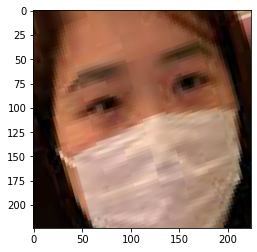

In [ ]:
# Open an image as a sample

from matplotlib import image
from matplotlib import pyplot

filename = data["train"]["mask"][0]
print(filename)
faceimage = image.imread(filename)
pyplot.imshow(faceimage)
pyplot.show()


### Setting Labels

Since our data will always fit into one of two categories, we most denote them using labels 0 and 1 for those 'with' and 'without' masks respectively. Although, we must first adjust the sizes of images so that our model can process them easier. \

  \

The following is repeated for each of the **Training**, **Testing**, and **Validation** datasets.

In [ ]:
import cv2

train_labels = []
train_data_set = []

test_labels = []
test_data_set = []

validation_labels = []
validation_data_set = []

# Training Set
for pathname in data["train"]["mask"]:
  readImage = image.imread(pathname)
  resizedImage = cv2.resize(readImage,(100,100))
  train_labels.append(0)  
  train_data_set.append(resizedImage)
for pathname in data["train"]["nomask"]:
  readImage = image.imread(pathname)
  resizedImage = cv2.resize(readImage,(100,100))
  train_labels.append(1) 
  train_data_set.append(resizedImage)

# Testing Set
for pathname in data["test"]["mask"]:
  readImage = image.imread(pathname)
  resizedImage = cv2.resize(readImage,(100,100)) 
  test_labels.append(0)  
  test_data_set.append(resizedImage)
for pathname in data["test"]["nomask"]:
  readImage = image.imread(pathname)
  resizedImage = cv2.resize(readImage,(100,100))
  test_labels.append(1) 
  test_data_set.append(resizedImage)

# Validation Set
for pathname in data["validation"]["mask"]:
  readImage = image.imread(pathname)
  resizedImage = cv2.resize(readImage,(100,100))
  validation_labels.append(0) 
  validation_data_set.append(resizedImage)
for pathname in data["validation"]["nomask"]:
  readImage = image.imread(pathname)
  resizedImage = cv2.resize(readImage,(100,100)) 
  validation_labels.append(1) 
  validation_data_set.append(resizedImage)


### Testing Labels and Shuffling Data

Let's first test that our labels are accurate, then let's shuffle our data to randomize the input for our model.

The label for the first 'Testing' image is: 1
The label for the second 'Validation' image is: 1


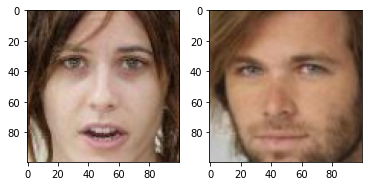

In [ ]:
test_image_num = -1
validation_image_num = -1

print("The label for the first 'Testing' image is:", test_labels[test_image_num])

print("The label for the second 'Validation' image is:", validation_labels[validation_image_num])

f, (ax1,ax2) = pyplot.subplots(1,2) 
ax1.imshow(test_data_set[test_image_num])
ax2.imshow(validation_data_set[validation_image_num])

pyplot.show()

In [ ]:
from sklearn.utils import shuffle 

train_data_set, train_labels = shuffle(train_data_set, train_labels)
test_data_set, test_labels = shuffle(test_data_set, test_labels)
validation_data_set, validation_labels = shuffle(validation_data_set, validation_labels)

train_data_set = np.array(train_data_set)
train_labels = np.array(train_labels)

test_data_set = np.array(test_data_set)
test_labels = np.array(test_labels)

validation_data_set = np.array(validation_data_set)
validation_labels = np.array(validation_labels)

[1 1 0 0 0 1 0 1 1 1]
[0 1 1 1 1 1 0 1 1 1]


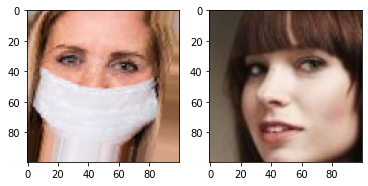

In [ ]:
# Test if our shuffling worked

print(train_labels[:10]) # First 10 Elements of our Train Set
print(test_labels[:10]) # First 10 Elements of our Test Set

f, (ax1,ax2) = pyplot.subplots(1,2) 
ax1.imshow(train_data_set[4])
ax2.imshow(test_data_set[4])

pyplot.show()


# Building Our Model

Now that our data is all set up, we can begin building our model. For the below code, we referenced a pre-existing CNN (Convolutional Neural Network) which performs a similar task.

In [ ]:
from keras.layers import Convolution2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout
from keras.layers import MaxPooling2D
from keras.models import Sequential
from keras import optimizers
from keras import layers
#from keras.utils import plot_model

model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(100 ,100, 3))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(units = 512, activation = 'relu'))
model.add(layers.Dense(units = 1, activation = 'sigmoid')) 
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])


#Final model


In [ ]:
"""
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(100 ,100, 3))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu', input_shape = (64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(units = 512, activation = 'relu'))
model.add(layers.Dense(units = 1, activation = 'sigmoid')) 
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])"""

#Model summary

In [ ]:
# Summarize the Neural Network we just built 
model.summary() 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 76832)             0         
                                                                 
 dense_4 (Dense)             (None, 512)               39338496  
                                                                 
 dense_5 (Dense)             (None, 1)                 513       
                                                                 
Total params: 39,339,905
Trainable params: 39,339,905
Non-trainable params: 0
__________________________________________

# Training Our Model

Upon building our model, the next step would be to test it using the 'Test' dataset. However, we must first declare our batch size and epochs prior to evaluation.

In [ ]:
history = model.fit(np.array(train_data_set), 
                         train_labels, 
                         batch_size = 64, 
                         epochs = 2,
                         validation_data = (validation_data_set,validation_labels)) 

Epoch 1/2
157/157 [==============================] - 89s 562ms/step - loss: 0.7382 - accuracy: 0.8981 - val_loss: 0.0526 - val_accuracy: 0.9850
Epoch 2/2
157/157 [==============================] - 87s 555ms/step - loss: 0.0405 - accuracy: 0.9858 - val_loss: 0.0325 - val_accuracy: 0.9900


### Evaluate, Save, Load, and Visualize our Model Below

In [ ]:
results = model.evaluate(test_data_set,test_labels, batch_size = 128)
model.save("my model")
model = keras.models.load_model("my model")

from scipy import ndimage
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = model.predict(test_data_set)

8/8 [==============================] - 2s 286ms/step - loss: 0.0544 - accuracy: 0.9849
INFO:tensorflow:Assets written to: my model/assets


# Predicting Using Our Model

Upon testing, we can run several input images through our model to assess its accuracy with new data.

The model predicts that the first person has: mask
The model predicts that the second person has: mask


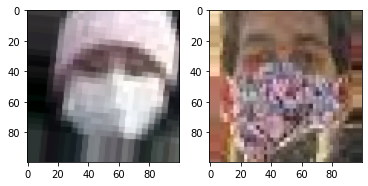

In [ ]:
mask_pred = []
for value in accuracy:
  if value<0.5: #if accuracy of model predicts less than 50%, then we assume it is label 0 (mask)
    mask_pred.append("mask")
  elif value>0.5: #if model predicts with accuracy of greater than 50%, we assume its label 1 (no mask)
    mask_pred.append("no mask")
  else:
    mask_pred.append("N/A")

print("The model predicts that the first person has:",mask_pred[12])
print("The model predicts that the second person has:",mask_pred[-2])

f, (ax1,ax2) = pyplot.subplots(1,2) 
ax1.imshow(test_data_set[12])
ax2.imshow(test_data_set[-2])
pyplot.show()



# Implementing Computer Vision


To take this model a step further, we can implement real-time, live video detection through use of OpenCV, an open-source computer vision library. Integrating webcam access on Google Colab is more complex than on a local machine, since it is a cloud-based environment.


In [ ]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import io
import html
import time

### Image Analysis

In order to render an image to be analyzed, we must make use of JavaScript.

In [ ]:
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """

  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

### Live Video

Similarly, JavaScript will allow us to render live video using our machine's webcam.

In [ ]:
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640;
      captureCanvas.height = 480;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# initialize the Haar Cascade face detection model

face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('data\\xml\\haarcascade_eye.xml')
mouth_cascade = cv2.CascadeClassifier('data\\xml\\haarcascade_mcs_mouth.xml')


# Using the Model

Now we can finally see the model in action! We now import a Multi-Tasl Cascaded CNN model that will help us identify a face within the camera's frame. We then take the bounding box of the detected face and feed it into our own pre-trained model.

Our model then gives us the decision which is then rendered onto the screen.

In [ ]:
def model_prediction(value):
  if value>0.5:
    return "No Mask"
  elif value<0.5:
    return "Masked"
  else:
    return "something went wrong!" + str(value)

In [ ]:
!pip install mtcnn 

     |████████████████████████████████| 2.3 MB 11.0 MB/s 


In [ ]:
from mtcnn import MTCNN
detector = MTCNN()

In [ ]:

video_stream()

label_html = 'Capturing...'

bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    boxes = detector.detect_faces(img)
    if boxes:
        box = boxes[0]['box']
        conf = boxes[0]['confidence']
        x, y, w, h = box[0], box[1], box[2], box[3]
 
        if conf > 0.5:
            face_frame = img[y:y+h,x:x+w]
            face_frame_resized = cv2.resize(face_frame,(100,100))
            face_frame_resized = np.expand_dims(face_frame_resized, axis=0)
            decision = model_prediction(model.predict(face_frame_resized))
            if decision == "No Mask":
              box_color = (255,0,0)
              cv2.putText(bbox_array, 'NO MASK', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, box_color, 2)
            elif decision == "Masked":
              box_color = (0,255,0)
              cv2.putText(bbox_array, 'MASKED', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, box_color, 2)
            else:
              cv2.putText(bbox_array, 'Cannot detect', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, box_color, 2)
              box_color = (255, 255, 255)
            bbox_array = cv2.rectangle(bbox_array, (x, y), (x + w, y + h), (255, 255, 255), 1)
  
    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
 
    bbox_bytes = bbox_to_bytes(bbox_array)

    bbox = bbox_bytes

<IPython.core.display.Javascript object>